# Automating Flow Cytometry Data Analysis

**USD M.Sc. Applied Data Science Capstone Project** \
*Shiley-Marcos School of Engineering* \


Gabriella Rivera\
John Vincent Deniega \
Date: 26Oct2024 \


## Flow Cytometry Data General Information

Selected cellular surface markers to identify target Dendritic Cells (DC): Myeloid DC and Plasmacytoid DC.

| Marker | Fluorochrome | Description |
|--------|--------------|--------------|
| CD45RA | Ax700 | An isoform of CD45, marking naïve T cells that haven't encountered their antigen
| HLA-DR | BV786 | An MHC class II molecule presenting antigens to CD4+ T cells; indicates antigen-presenting cells (APCs)
| CD3 | APC-H7 | Part of the T-cell receptor complex, essential for T cell activation; found on all T cells
| CD20 | BUV805 | A B cell marker involved in activation and proliferation; used to identify B cells
| CD19 | PE-Cy5 | A co-receptor for B cell activation, primarily expressed on B cells
| CD14 | BV510 | A co-receptor for LPS, marking monocytes and macrophages involved in innate immunity
| CD123 | BB660 | The alpha chain of the IL-3 receptor, found on plasmacytoid dendritic cells and progenitor cells
| CD11c | APC | An integrin marking dendritic cells and certain macrophages, important for cell adhesion and activation

**Cellular Pathway:**

1. *PBMCs (Peripheral Blood Mononuclear Cells)* \
   Starting population

2. *CD3-* \
   Excludes T cells, focusing on B cells and myeloid cells

3. *CD19- & CD20-*  \
   Excludes B cells, narrowing down to monocytes and dendritic cells

4. *CD14-*  \
   Further excludes monocytes, leading to dendritic cell populations

5. *HLA-DR+*  \
   Identifies antigen-presenting cells (APC)

6. *CD11c+ (Myeloid DC)*  \
   Indicates myeloid dendritic cells  \

  **OR**
   
   *CD123+ (Plasmacytoid DC)*   \
   Indicates plasmacytoid dendritic cells


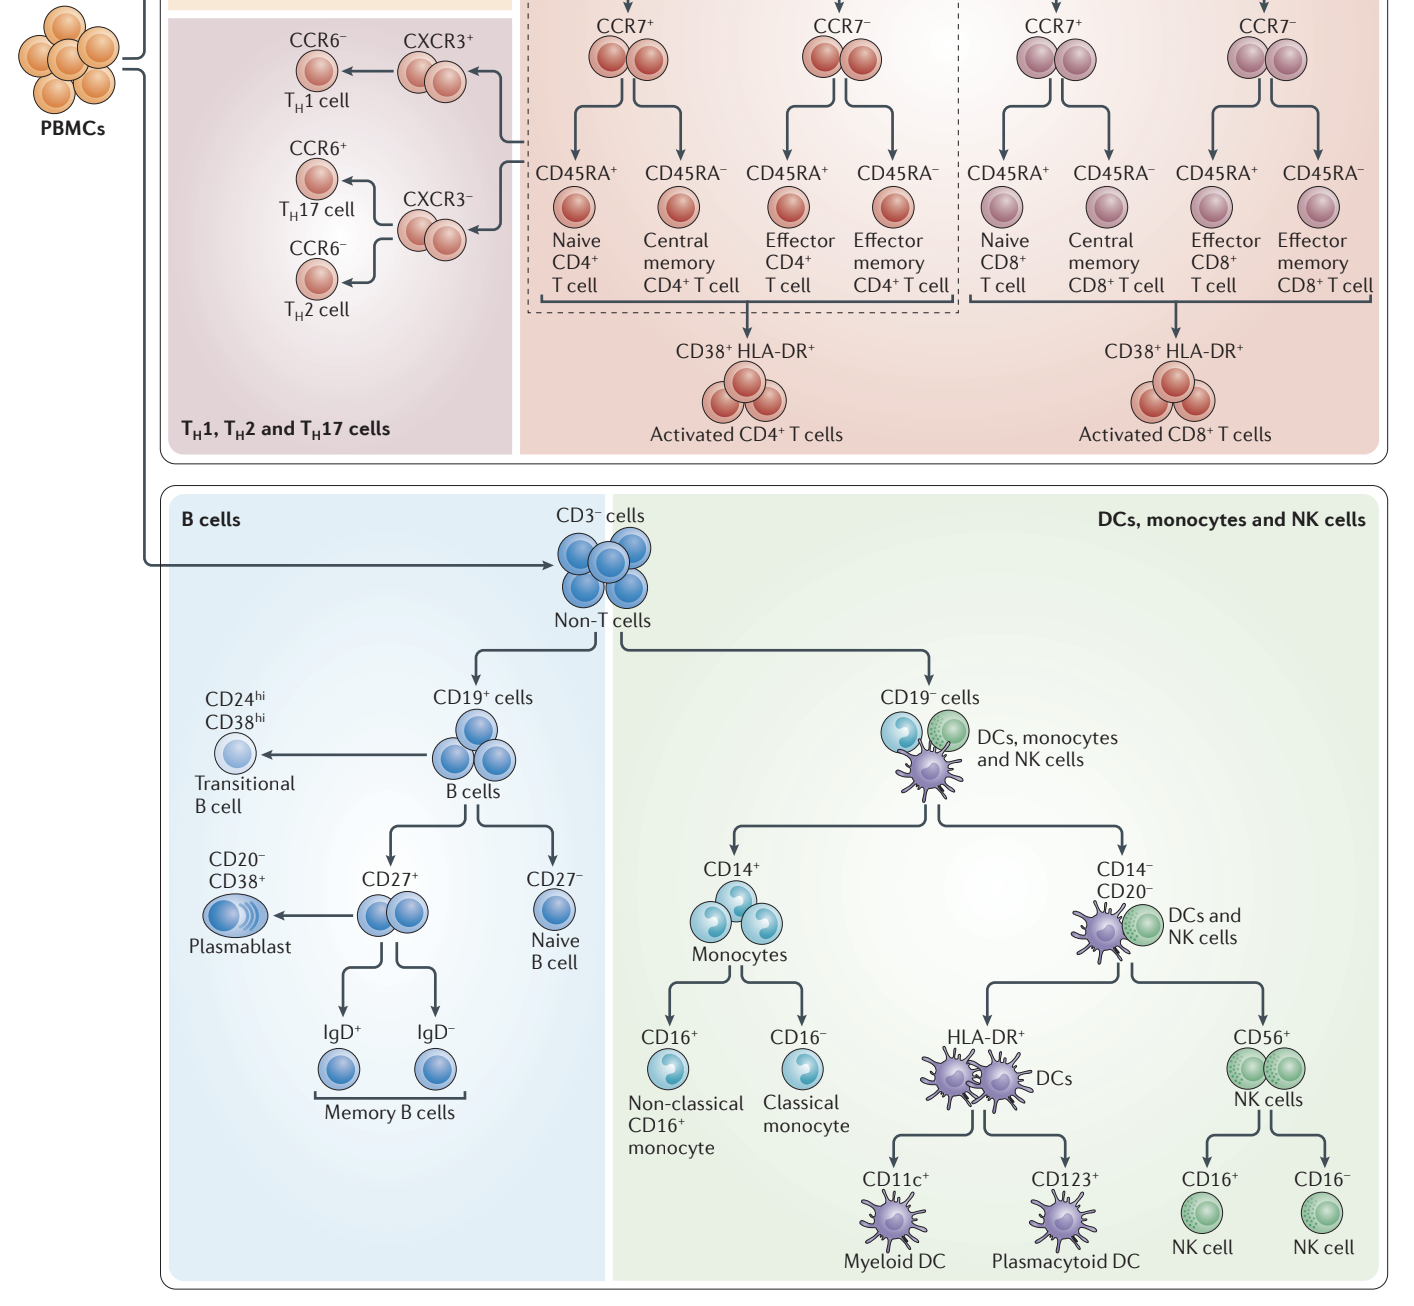

## Flow Cytometry Data Extraction

Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install packages:

In [ ]:
!pip install FlowCal
!pip install flowio

Import libraries:

In [ ]:
import FlowCal
import flowio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

## Data Preprocessing or Data Wrangling

## Exploratoty Data Analysis

## Training, Validation, and Test Data sets

**Cleaned data sets to be used for Model Development and Testings**

## Model Development

import os

### Define relative path to FCS folder via user's home directory
home_dir = os.path.expanduser("~")
folder_path = os.path.join(home_dir, "Desktop", "usd_ADS", "ADS599", "Notebook", "FlowRepository_FR-FCM-Z32U_files")

### Check if the folder exists
if not os.path.exists(folder_path):
    print(f"Directory not found: {folder_path}")
else:
    # Iterate through all files in the given folder
    for filename in os.listdir(folder_path):
        # Join path and individual filename
        old_file_path = os.path.join(folder_path, filename)
        
        # Check if it is a file
        if os.path.isfile(old_file_path):
            # Replace spaces with underscores to avoid coding errors
            new_filename = filename.replace(" ", "_")
            new_file_path = os.path.join(folder_path, new_filename)
            
            # Rename the file with underscores
            os.rename(old_file_path, new_file_path)
            print(f"Renamed '{filename}' to '{new_filename}'")

### CADM1 FITC Test - (Figure out later to keep or not)

In [ ]:
# Define the paths dynamically
home_dir = os.path.expanduser("~")
# Change the words after home_dir to reflect your local location/directories for the FCS files
#fcs_folder = os.path.join(home_dir,
#                          "Desktop",
#                          "usd_ADS",
#                          "ADS599",
#                          "Notebook",
#                          "FlowRepository_FR-FCM-Z32U_files")
# Use this fsc_folder path if using Google Colab
fcs_folder = "/content/drive/MyDrive/Colab_Notebooks/ADS599"
fcs_file = "Comp_CADM1_FITC_D2_D02_012.fcs" # Test instance of an FCS file in the folder

# Combine for full path
file_path = os.path.join(fcs_folder, fcs_file)

# Load the FCS data into object and print
s = FlowCal.io.FCSData(file_path)

In [ ]:
s[:3]

FCSData([[ 3.15035430e+04,  3.34625391e+04,  3.12494995e+03,
           1.09415869e+04,  5.45711060e+02,  2.38198929e+02,
           1.09296906e+02,  1.25232630e+01,  1.79159012e+02,
           4.64346008e+02,  2.26655212e+02,  1.51446243e+02,
           2.48909111e+01,  1.28595457e+01, -1.72899401e+00,
          -9.25848389e+00,  2.07025711e+02,  5.62349243e+01,
           2.54767014e+02,  2.31491684e+02,  1.27558794e+01,
          -2.48829689e+01,  6.84096479e+00,  1.88843746e+01,
          -7.46806812e+00, -6.02076769e+00,  1.99886200e+02,
           4.30685654e+01,  5.52062273e-01,  4.34756804e+00,
           3.38142633e+00,  5.87200047e-03],
         [ 3.56520820e+04,  3.77054961e+04,  3.64067236e+03,
           1.28165576e+04,  6.05351074e+02,  2.81205841e+02,
           1.31921799e+02,  2.32359333e+01,  2.76197998e+02,
           6.11943604e+02,  3.08346252e+02,  1.50466171e+02,
           4.64081001e+01,  2.37029171e+00,  3.00475979e+01,
           9.95562840e+00,  1.60802338e+

In [ ]:
print("Shape: ", s.shape, "\n")
print("Channels: ", s.channels)

# Because S is a FlowCal.io.FCSData object, convert for easier data handling
s_np = np.array(s).astype('<f4') # Convert to little-endian NumPy array
fsc_a_data = s_np[:, 0] # Extract FSC-A data as it is in the 0th place

print("\nFirst 10 events in FITC-A channel:")
print(", ".join([f'{x:.2f}' for x in fsc_a_data[:10]])) # Truncate to 2 decimal places

mean_fsc_a = np.mean(fsc_a_data)
std_fsc_a = np.std(fsc_a_data)
print(f'\nFSC-A Mean: {mean_fsc_a:.2f}\nFSC-A Std Dev: {std_fsc_a:.2f}')

Shape:  (20000, 32) 

Channels:  ('FSC-A', 'FSC-H', 'SSC-A', 'B515-A', 'B610-A', 'B660-A', 'B710-A', 'B780-A', 'V450-A', 'V510-A', 'V570-A', 'V605-A', 'V655-A', 'V710-A', 'V750-A', 'V785-A', 'U390-A', 'U450-A', 'U500-A', 'U570-A', 'U660-A', 'U740-A', 'U785-A', 'R670-A', 'R730-A', 'R780-A', 'G575-A', 'G610-A', 'G660-A', 'G710-A', 'G780-A', 'Time')

First 10 events in FITC-A channel:
31503.54, 35652.08, 32035.37, 33674.53, 32198.94, 36507.20, 33340.48, 31283.46, 33443.36, 34430.05

FSC-A Mean: 33746.41
FSC-A Std Dev: 6609.38


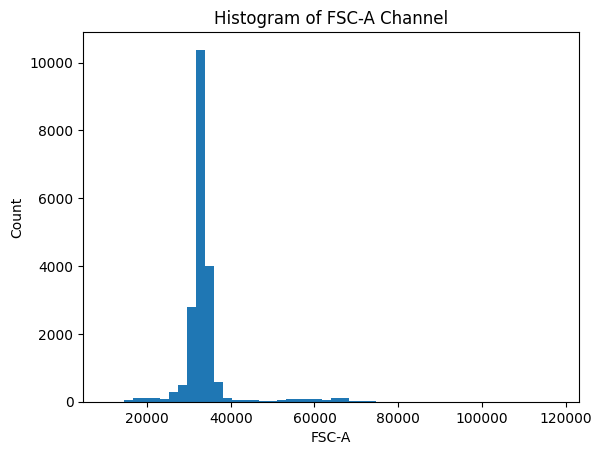

In [ ]:
# Extract data for the specific channel
channel_data = s[:, 'FSC-A']

# Plot histogram using matplotlib
plt.hist(channel_data, bins=50)
plt.xlabel('FSC-A')
plt.ylabel('Count')
plt.title('Histogram of FSC-A Channel')
plt.show()



### PBMC Test - (Move some parts to right places later)

In [ ]:
# Define the paths dynamically
home_dir = os.path.expanduser("~")
# Change the words after home_dir to reflect your local location/directories for the FCS files
#fcs_folder = os.path.join(home_dir,
#                          "Desktop",
#                          "usd_ADS",
#                          "ADS599",
#                          "Notebook",
#                          "FlowRepository_FR-FCM-Z32U_files")
# Use this fsc_folder path if using Google Colab
fcs_folder = "/content/drive/MyDrive/Colab_Notebooks/ADS599"
pbmc_file = "PBMC_090120_1_DCs_A5_A05_031.fcs" # Test instance of an PBMC FCS file in the folder

# Combine for full path
pbmc_path = os.path.join(fcs_folder, pbmc_file)

# Load the FCS data into object and print
pbmc = FlowCal.io.FCSData(pbmc_path)

In [ ]:
print("Shape: ", pbmc.shape, "\n")
print("Channels: ", pbmc.channels)

# Because S is a FlowCal.io.FCSData object, convert for easier data handling
pbmc_np = np.array(pbmc).astype('<f4') # Convert to little-endian NumPy array
fsc_a_data = pbmc_np[:, 0] # Extract FSC-A data as it is in the 0th place

print("\nFirst 10 events in FITC-A channel:")
print(", ".join([f'{x:.2f}' for x in fsc_a_data[:10]])) # Truncate to 2 decimal places

mean_fsc_a = np.mean(fsc_a_data)
std_fsc_a = np.std(fsc_a_data)
print(f'\nFSC-A Mean: {mean_fsc_a:.2f}\nFSC-A Std Dev: {std_fsc_a:.2f}')

Shape:  (2088689, 32) 

Channels:  ('FSC-A', 'FSC-H', 'SSC-A', 'B515-A', 'B610-A', 'B660-A', 'B710-A', 'B780-A', 'V450-A', 'V510-A', 'V570-A', 'V605-A', 'V655-A', 'V710-A', 'V750-A', 'V785-A', 'U390-A', 'U450-A', 'U500-A', 'U570-A', 'U660-A', 'U740-A', 'U785-A', 'R670-A', 'R730-A', 'R780-A', 'G575-A', 'G610-A', 'G660-A', 'G710-A', 'G780-A', 'Time')

First 10 events in FITC-A channel:
87361.88, 126908.38, 80773.44, 98579.29, 81687.25, 39737.04, 92495.29, 135816.33, 98502.38, 79709.81

FSC-A Mean: 83295.86
FSC-A Std Dev: 285028.12


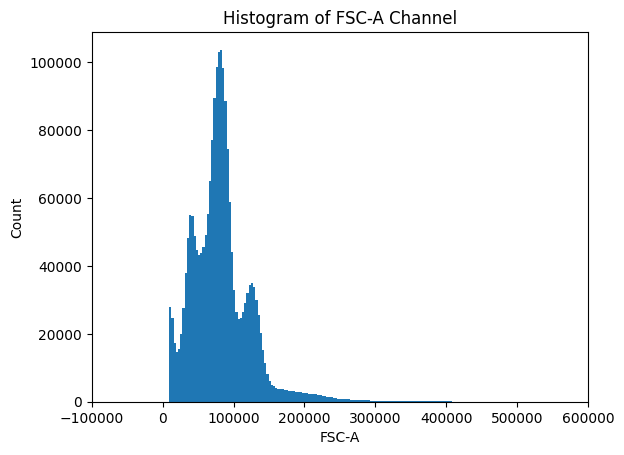

In [ ]:
# Extract data for the specific channel
channel_data = pbmc[:, 'FSC-A']

# Plot histogram using matplotlib
plt.hist(channel_data, bins=100000)
plt.xlabel('FSC-A')
plt.ylabel('Count')
plt.title('Histogram of FSC-A Channel')
plt.xlim(-100000, 600000)
plt.show()

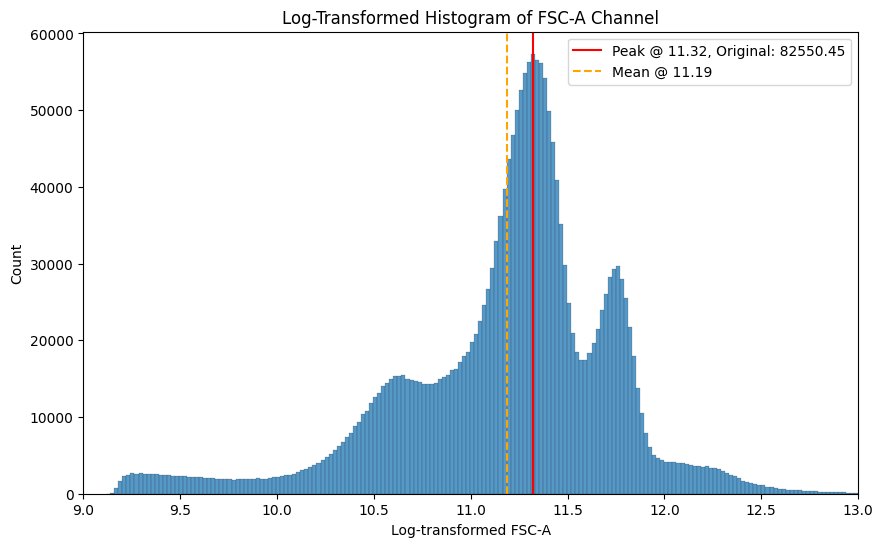

In [ ]:
channel_data = pbmc[:, 'FSC-A'].astype('<f4')
channel_data = np.log1p(channel_data) # Optional: log-transform
plt.figure(figsize=(10,6))
sns.histplot(channel_data, bins=500, kde=False)
plt.xlabel('Log-transformed FSC-A')
plt.ylabel('Count')
plt.title('Log-Transformed Histogram of FSC-A Channel')

# Add a line at the peak
counts, bin_edges = np.histogram(channel_data, bins=500) # Gather histogram parameters
peak_bin = bin_edges[np.argmax(counts)] # Bin with the largest count
peak_value = peak_bin + (bin_edges[1] - bin_edges[0]) / 2 # Calculate the center of the largest bin
peak_original_value = np.expm1(peak_value) # Exponentiate to retrieve original value
plt.axvline(peak_value,
            color='red',
            linestyle='solid',
            label=f'Peak @ {peak_value:.2f}, Original: {peak_original_value:.2f}')

# Add vertical line with mean
mean_fsc_a = np.mean(channel_data)
plt.axvline(mean_fsc_a, color='orange', linestyle='--', label=f'Mean @ {mean_fsc_a:.2f}')
plt.legend()
plt.xlim(9, 13) # Adjusting for visibility
plt.show()

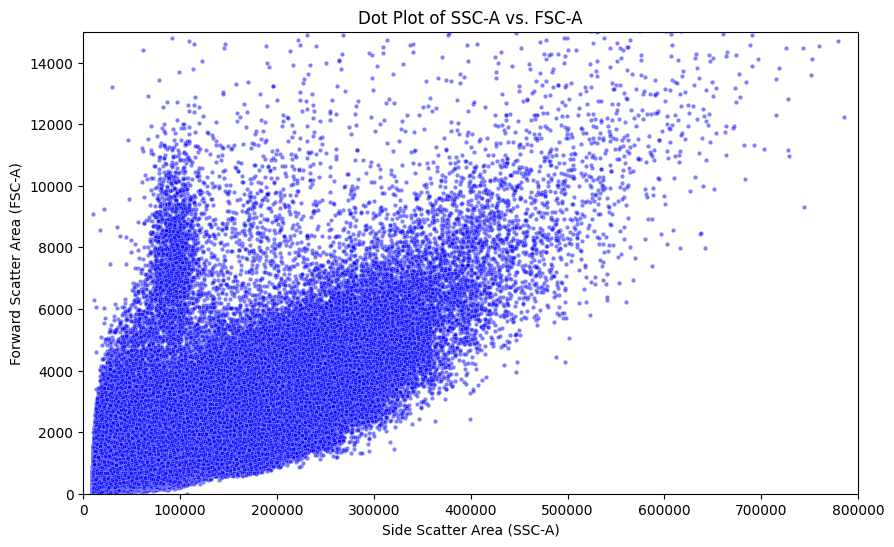

In [ ]:
fsc_a = pbmc[:, 'FSC-A'].astype('<f4') # Small-endian for conversion error
ssc_a = pbmc[:, 'SSC-A'].astype('<f4')
data = pd.DataFrame({
    'FSC-A': fsc_a,
    'SSC-A': ssc_a})

plt.figure(figsize=(10,6))
sns.scatterplot(x='FSC-A', y='SSC-A', data=data, s=10, alpha=0.5, color='blue')
plt.xlabel('Side Scatter Area (SSC-A)')
plt.ylabel('Forward Scatter Area (FSC-A)')
plt.title('Dot Plot of SSC-A vs. FSC-A')
plt.xlim(0, 800000)
plt.ylim(0, 15000)
plt.show()

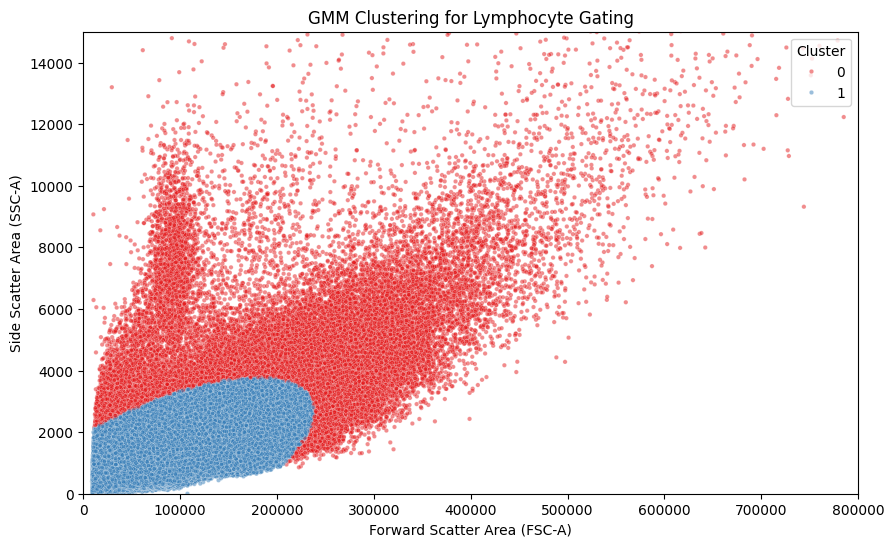

In [ ]:
fsc_a = pbmc[:, 'FSC-A'].astype('<f4')
ssc_a = pbmc[:, 'SSC-A'].astype('<f4')
data = pd.DataFrame({
    'FSC-A': fsc_a,
    'SSC-A': ssc_a
})

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['FSC-A', 'SSC-A']])

n_components = 2
gmm = GaussianMixture(n_components=n_components, n_init=10, max_iter=500, random_state=599)
gmm.fit(data_scaled)

data['Cluster'] = gmm.predict(data_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x='FSC-A', y='SSC-A', hue='Cluster', data=data, palette='Set1', s=10, alpha=0.5)
plt.xlabel('Forward Scatter Area (FSC-A)')
plt.ylabel('Side Scatter Area (SSC-A)')
plt.title('GMM Clustering for Lymphocyte Gating')
plt.xlim(0, 800000)
plt.ylim(0, 15000)
plt.legend(title='Cluster', loc='upper right')
plt.show()

## Model Performance Evaluation and Model Selection

## Model Testing: non-conventional sample

# Tableau or FLASK Release

# References

1. Beckman Coulter. (2022). Automatic gating - Beckman Coulter. Flow Cytometry. [https://www.beckman.com/flow-cytometry/software/cytobank-premium/learning-center/automatic-gating](https://www.beckman.com/flow-cytometry/software/cytobank-premium/learning-center/automatic-gating)

2. FlowRepository. (2020). FlowRepository ID FR-FCM-Z32U. Retrieved from [http://flowrepository.org/experiments/3166/download_ziped_files](http://flowrepository.org/experiments/3166/download_ziped_files)

3. Hu, Z., Bhattacharya, S., & Butte, A. J. (2022). Application of Machine Learning for Cytometry Data. *Frontiers in Immunology*, 12, 787574. [https://doi.org/10.3389/fimmu.2021.787574](https://doi.org/10.3389/fimmu.2021.787574)

4. Mair, F., & Leichti, T. (2020). Comprehensive Phenotyping of Human Dendritic Cells and Monocytes. *Journal of Quantitative Cell Science*, 99(3), 231-242. [https://doi.org/10.1002/cyto.a.24269](https://doi.org/10.1002/cyto.a.24269)

5. Maecker, H. T., McCoy, J. P., & Nussenblatt, R. (2012). Standardizing immunophenotyping for the Human Immunology Project. *Nature Reviews Immunology*, 12(3), 191–200. [https://doi.org/10.1038/nri3158](https://doi.org/10.1038/nri3158)

6. Ng, D. P., Simonson, P. D., Tarnok, A., Lucas, F., Kern, W., Rolf, N., Bogdanoski, G., Green, C., Brinkman, R. R., & Czechowska, K. (2024). Recommendations for using artificial intelligence in clinical flow cytometry. *Cytometry Part B: Clinical Cytometry*, 106(4), 228–238. [https://doi.org/10.1002/cyto.b.22166](https://doi.org/10.1002/cyto.b.22166)
